In [92]:
# IN THIS NOTEBOOK I USED actor_data.txt TO EXTRACT DESIRED AGE GROUPS.
# ACTOR DATA CONTAINS ALL CELEBRITIES ON imdb.com, THEIR AGE, OCCUPATION...

# THERE WAS A LOT OF IMBALANCES OF FEATURES WHEN IT COMES TO SPECIFYING AGE GROUPS, THEREFORE
#    THIS FILE WAS NOT AUTOMATED TO OUTPUT DISTINCT AGE GROUPS AUTOMATICALLY. MANUAL DATA EXPLORATION
#    AND EXTRACTION WAS NECESSARY TO GET SOME COMPROMISE BETWEEN NUMBER OF FEATURES AND AGE GROUPS.

In [93]:
import pandas as pd
import numpy as np

In [94]:
source = "C:/Users/lazni/PycharmProjects/Age_Predictor/source_data/actor_data.txt"
data = pd.read_table(source, sep='\t')

In [95]:
df = pd.DataFrame(data)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11782665 entries, 0 to 11782664
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   nconst             object
 1   primaryName        object
 2   birthYear          object
 3   deathYear          object
 4   primaryProfession  object
 5   knownForTitles     object
dtypes: object(6)
memory usage: 539.4+ MB


In [97]:
df

nconst         primaryName birthYear deathYear  \
0         nm0000001        Fred Astaire      1899      1987   
1         nm0000002       Lauren Bacall      1924      2014   
2         nm0000003     Brigitte Bardot      1934        \N   
3         nm0000004        John Belushi      1949      1982   
4         nm0000005      Ingmar Bergman      1918      2007   
...             ...                 ...       ...       ...   
11782660  nm9993714   Romeo del Rosario        \N        \N   
11782661  nm9993716       Essias Loberg        \N        \N   
11782662  nm9993717  Harikrishnan Rajan        \N        \N   
11782663  nm9993718         Aayush Nair        \N        \N   
11782664  nm9993719          Andre Hill        \N        \N   

                            primaryProfession  \
0              soundtrack,actor,miscellaneous   
1                          actress,soundtrack   
2         actress,soundtrack,music_department   
3                     actor,soundtrack,writer   
4                       writer,director,actor   
...                                       ...   
11782660  animation_department,art_department   
11782661                                  NaN   
11782662                      cinematographer   
11782663                      cinematographer   
11782664                                  NaN   

                                   knownForTitles  
0         tt0053137,tt0072308,tt0050419,tt0031983  
1         tt0071877,tt0038355,tt0037382,tt0117057  
2         tt0056404,tt0054452,tt0049189,tt0057345  
3         tt0078723,tt0077975,tt0080455,tt0072562  
4         tt0083922,tt0050976,tt0050986,tt0060827  
...                                           ...  
11782660          tt14069590,tt2455546,tt11657662  
11782661                                       \N  
11782662                                tt8736744  
11782663                                       \N  
11782664                                       \N  

[11782665 rows x 6 columns]

In [98]:
type(df.iloc[11782660][0])

str

In [99]:
# drop rows with filter (similar like filtering with iloc/loc etc...)
filter_ = df["birthYear"] == '\\N'
df.drop(df[filter_].index, inplace=True)

df.drop(columns=["primaryProfession", "knownForTitles"], inplace=True)

In [100]:
df["birthYear"] = df["birthYear"].astype(int)

In [101]:
# filter_ = df["birthYear"] >= 2004
# df.drop(df[filter_].index, inplace=True)

# filter_ = df["birthYear"] < 1940
# df.drop(df[filter_].index, inplace=True)

df = df[0:400_000]

In [102]:
# df.set_index("nconst", inplace=True)

In [103]:
# set nan values to year 2022 if they are not dead yet
df["deathYear"] = np.where(df["deathYear"] == "\\N", 2022, df["deathYear"])
df["deathYear"] = df["deathYear"].astype(int)

C:\Users\lazni\AppData\Local\Temp\ipykernel_8672\1307274600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["deathYear"] = np.where(df["deathYear"] == "\\N", 2022, df["deathYear"])
C:\Users\lazni\AppData\Local\Temp\ipykernel_8672\1307274600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["deathYear"] = df["deathYear"].astype(int)


In [104]:
# filter desired age groups

df["currentAge"] = df["deathYear"] - df["birthYear"]
filter_ = df["currentAge"] < 20 
df.drop(df[filter_].index, inplace=True)

# filter_ = df["currentAge"] > 27 
# df.drop(df[filter_].index, inplace=True)

C:\Users\lazni\AppData\Local\Temp\ipykernel_8672\2942524767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["currentAge"] = df["deathYear"] - df["birthYear"]
C:\Users\lazni\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397949 entries, 0 to 5503799
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   nconst       397949 non-null  object
 1   primaryName  397949 non-null  object
 2   birthYear    397949 non-null  int32 
 3   deathYear    397949 non-null  int32 
 4   currentAge   397949 non-null  int32 
dtypes: int32(3), object(2)
memory usage: 13.7+ MB


In [106]:
df.head()

nconst      primaryName  birthYear  deathYear  currentAge
0  nm0000001     Fred Astaire       1899       1987          88
1  nm0000002    Lauren Bacall       1924       2014          90
2  nm0000003  Brigitte Bardot       1934       2022          88
3  nm0000004     John Belushi       1949       1982          33
4  nm0000005   Ingmar Bergman       1918       2007          89

In [107]:
df["currentAge"].describe()

count    397949.000000
mean         63.345461
std          19.074489
min          20.000000
25%          49.000000
50%          63.000000
75%          77.000000
max        2009.000000
Name: currentAge, dtype: float64

In [108]:
df.sort_values(by="currentAge", ascending=True).head()

nconst       primaryName  birthYear  deathYear  currentAge
1662674  nm10788250       Sean Holden       2002       2022          20
3471040  nm12661613        Juan Acedo       2002       2022          20
3468729  nm12659238  Kamran Singariya       2002       2022          20
4296181  nm13541368         Blondness       2002       2022          20
4475725  nm13731233     Fardu Hussain       2002       2022          20

In [109]:
# visualise ID of the person and their age
print(df.iloc[0][0], df.iloc[0][-1])
print(df.iloc[1][0], df.iloc[1][-1])

nm0000001 88
nm0000002 90


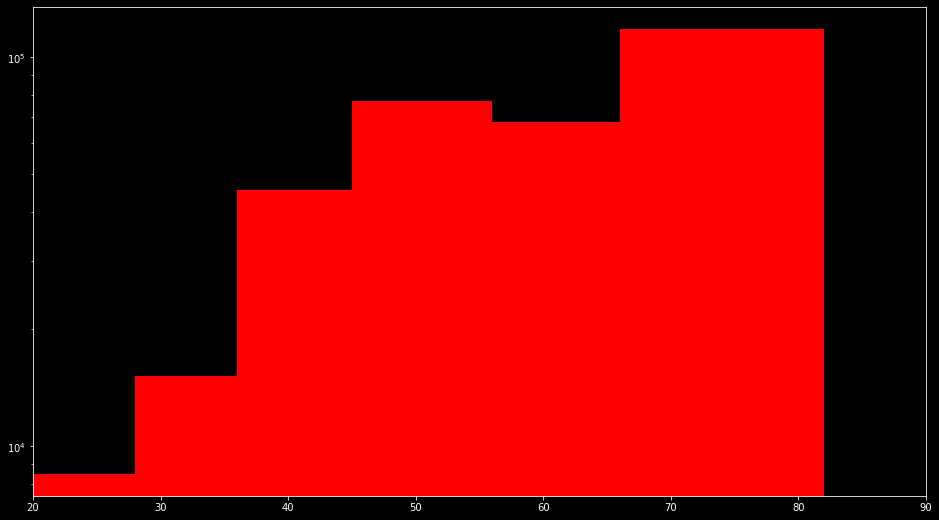

In [110]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")
plt.figure(figsize=(16,9))
plt.hist(df["currentAge"], color="red", bins=[20, 28, 36, 45, 56, 66, 82])
plt.yscale("log")
plt.xlim(20, 90)
plt.show()

In [111]:
# save to csv
# df.to_csv("C:/Users/lazni/PycharmProjects/Age_Predictor/source_data/source_data_0.csv")